In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
dataset = pd.read_csv('/content/drive/MyDrive/multiple_linear_regression_dataset.csv')
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [18]:
dataset.describe

<bound method NDFrame.describe of     age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700>

In [19]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [20]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

ValueError: all features must be in [0, 1] or [-2, 0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(16, 2)

In [22]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = multi_regressor.predict(X_test)

In [24]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[ -97.99352918 2205.90861907]
30945.793141906892


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [29]:
input_data = [[20, 2]]
print(multi_regressor.predict(input_data))


[33397.73979647]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.8872690560355565


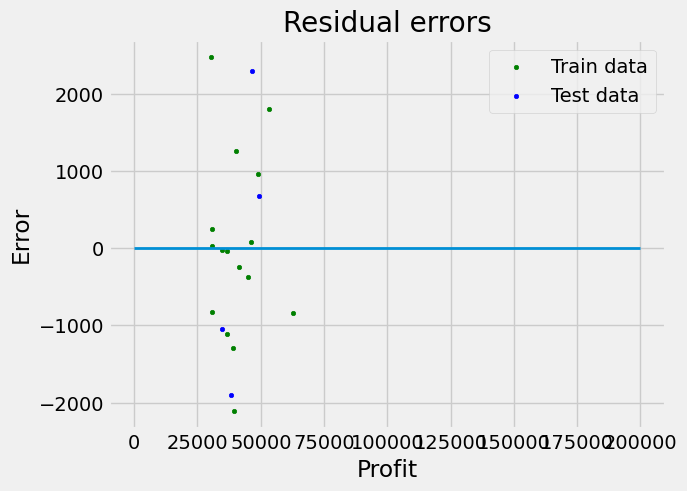

In [27]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1480.7713503254436
MSE: 2611228.4245839915
RMSE: 1615.9295852802472


**POLYNOMIAL REGRESSION**

In [30]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [31]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [32]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [33]:
print(y_poly)

[46296.64887225 34786.69848651 48395.31015398 38257.19072938]
